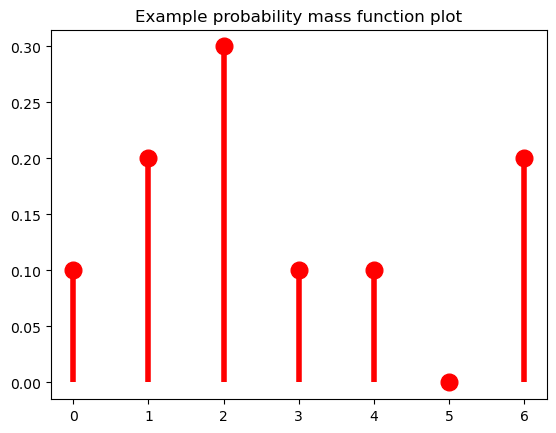

In [2]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
custm = stats.rv_discrete(name="custm", values=(xk, pk))
fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), "ro", ms=12, mec="r")
ax.vlines(xk, 0, custm.pmf(xk), colors="r", lw=4)
plt.title("Example probability mass function plot")
plt.show()

{1: array(0.20125), 2: array(0.263375), 4: array(0.3208125), 8: array(0.366625), 16: array(0.40275), 32: array(0.4283125), 64: array(0.4485), 128: array(0.463875), 256: array(0.474625), 512: array(0.481375), 1024: array(0.48625), 2048: array(0.4894375), 4096: array(0.49075), 8192: array(0.4915), 16384: array(0.4915625)}


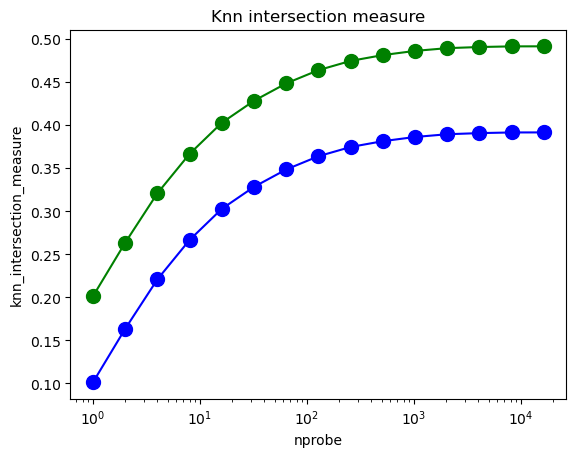

In [6]:
from typing import List
import numpy as np

root: str = "/checkpoint/marialomeli/offline_faiss/seamless/groundtruth_eng_0"
nprobes: List[int] = [2**p for p in range(15)]
kims = []
n = len(nprobes)
for i in range(n):
    kim = np.load(root + f"/knn_intersection_measure_16_nprobe_{nprobes[i]}.npy")
    kims.append(kim)
print(dict(zip(nprobes, kims)))
plt.plot(nprobes, kims, "o-", markersize=10, color="g")
plt.xscale("log")
plt.xlabel("nprobe")
plt.ylabel("knn_intersection_measure")
plt.savefig("logscale_knn_intesection_metric.pdf")
plt.title("Knn intersection measure")
plt.show()

12.771149
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
[12.25508840417862, 12.3617710775733, 12.443489281058312, 12.492570032060147, 12.53261451804638, 12.558481018245221, 12.577798544883729, 12.592039483487605, 12.602246481716632, 12.609259644508361, 12.613598398447037, 12.616134636104107, 12.617673791587352, 12.618548696100712, 12.618656105816365]


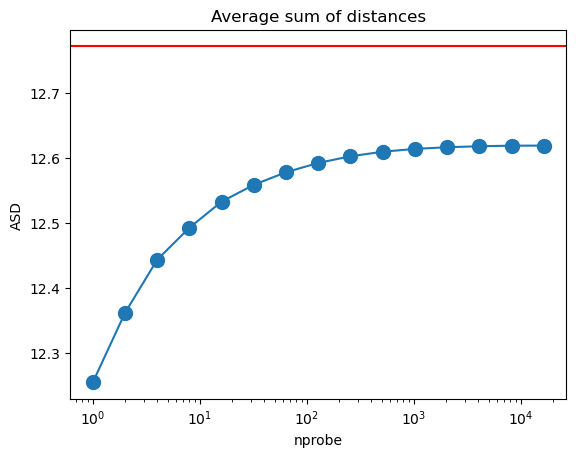

In [4]:
from typing import List

root: str = "/checkpoint/marialomeli/offline_faiss/seamless/groundtruth_eng_0"
D_gt = np.load(root + "/D_16.npy")
average_distances = []
suma = np.sum(D_gt, axis=1)
distance_average_gt = np.mean(suma)
print(distance_average_gt)
nprobes: List[int] = [2**p for p in range(15)]
print(nprobes)
for nprobe in nprobes:
    D_approx = np.load(root + f"/D_neighbours_xb_eng_0_with_xq_eng_3_k_16_nprobe_{nprobe}.npy")
    suma = np.sum(D_approx, axis=1)
    average_distances.append(np.mean(suma))

plt.plot(nprobes, average_distances, "o-", markersize=10)
plt.axhline(distance_average_gt, color="r")
print(average_distances)
plt.xscale("log")
plt.xlabel("nprobe")
plt.title("Average sum of distances")
plt.savefig("Average_sum_of_inner_prods_metric.pdf")
plt.ylabel("ASD")
plt.show()

In [7]:
root: str = "/checkpoint/marialomeli/offline_faiss/seamless/groundtruth_eng_0"
D_gt1 = np.load(root + "/D_neighbours_xb_eng_0_with_xq_eng_3I_16.npy")
D_gt = np.load(root + "/D_16.npy")
print(D_gt[0, :])
D_gt1[0, :]

[0.8809574  0.87862116 0.8651828  0.8620556  0.85484576 0.8520513
 0.8509318  0.8500287  0.8492534  0.8488504  0.8484476  0.8480064
 0.8454313  0.8452529  0.84499234 0.84476906]


array([0.88059038, 0.87847996, 0.865013  , 0.86214006, 0.85475087,
       0.85178018, 0.85093701, 0.85028678, 0.84920692, 0.84884071,
       0.84863627, 0.84765589, 0.84527123, 0.8453685 , 0.84514534,
       0.84463632])

In [1]:
import numpy as np

In [5]:
12.5326 / 12.771149

0.9813212577818958